# Task 3.1+ Unsupervised Learning (optional)


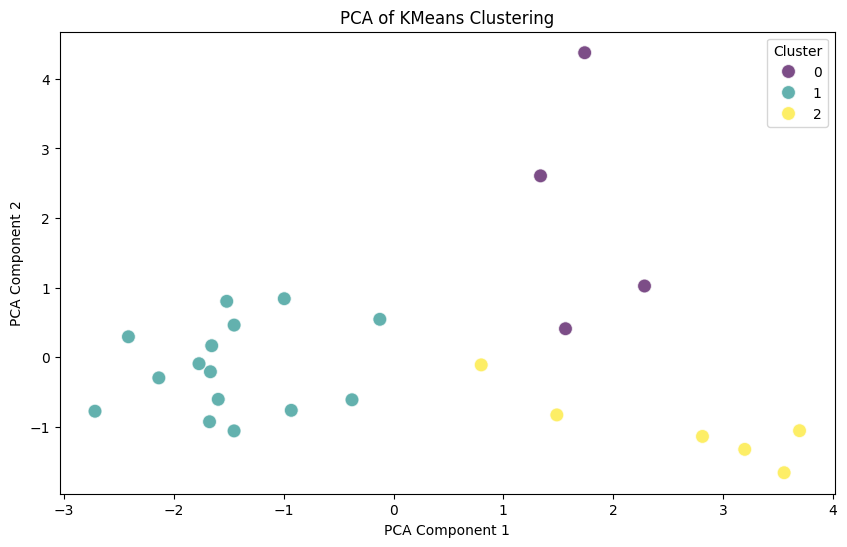

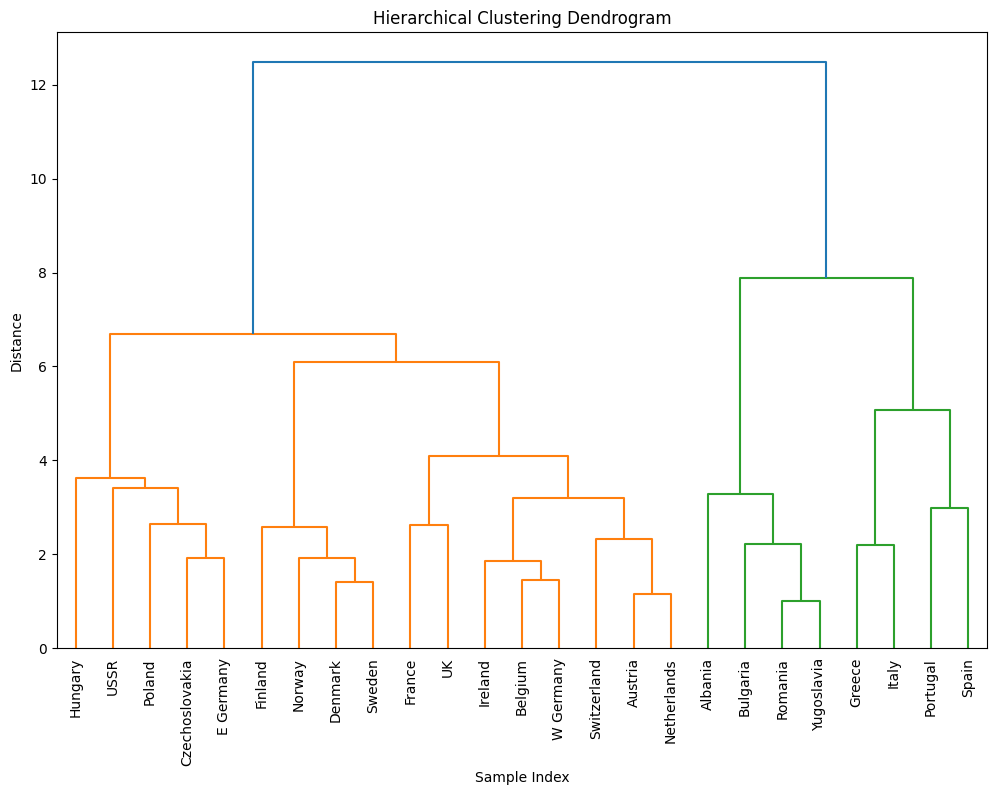

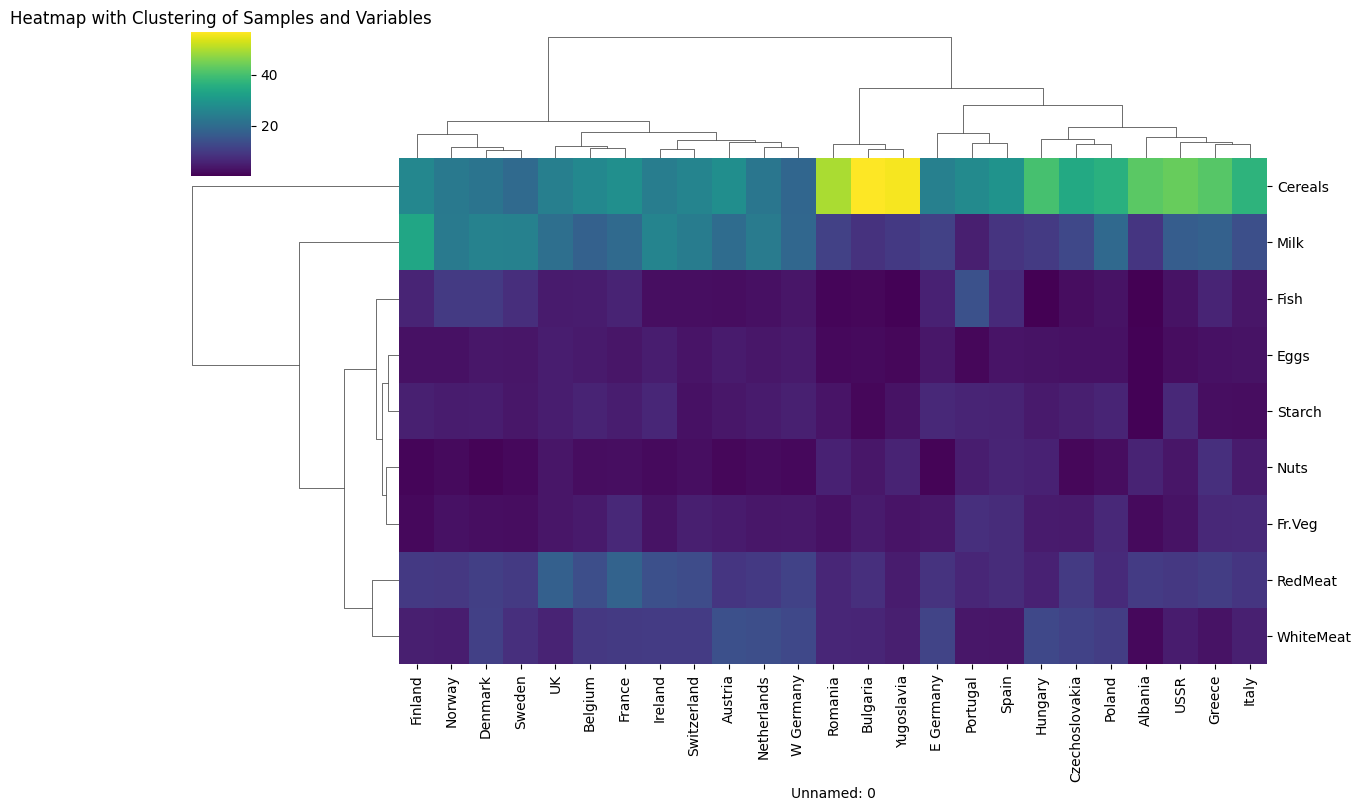

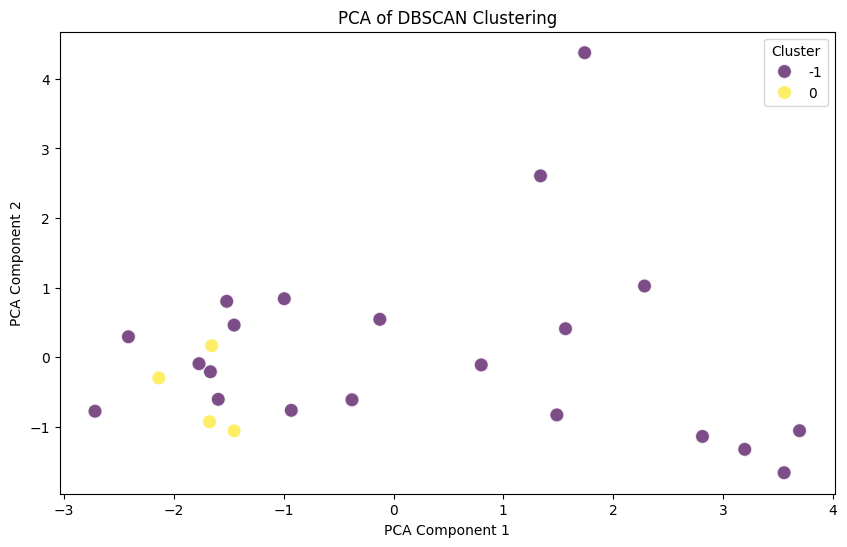

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

# Load the dataset
file_path = 'Downloads/food.csv'
df_food = pd.read_csv(file_path)

# Preprocess data using z-transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_food.drop(columns=['Unnamed: 0']))

# Apply KMeans for different number of clusters by varying k from 2 to 5 and calculate the Silhouette coefficient
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Select the final number of clusters (the one with the highest Silhouette coefficient)
optimal_k = range(2, 6)[silhouette_scores.index(max(silhouette_scores))]
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)

# Visualize the final kMeans clustering using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=final_labels, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Create a hierarchical clustering and plot the dendrogram
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df_food.iloc[:, 0].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Create a heatmap with a clustering of samples and variables
sns.clustermap(df_food.set_index(df_food.columns[0]).T, method='ward', cmap='viridis', figsize=(12, 8))
plt.title('Heatmap with Clustering of Samples and Variables')
plt.show()

# Create a density based clustering using DBSCAN
db = DBSCAN(eps=1.5, min_samples=3)
db_labels = db.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the dataframe
df_food['DBSCAN_Cluster'] = db_labels

# Visualize DBSCAN clustering using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=db_labels, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
